# Final Project

## David Brooks
K-State Honor Code: "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work.

## Dataset Attributes

|Variable Name |Description|
|:---------------|:------------|
|movie_title| Title of the Movie|
|duration |Duration in minutes|
|director_name |Name of the Director of the Movie
|director_facebook_likes |Number of likes of the Director on his Facebook Page|
|actor_1_name|Primary actor starring in the movie|
|actor_1_facebook_likes|Number of likes of the Actor_1 on his/her Facebook Page|
|actor_2_name|Other actor starring in the movie|
|actor_2_facebook_likes|Number of likes of the Actor_2 on his/her Facebook Page|
|actor_3_name|Other actor starring in the movie|
|actor_3_facebook_likes|Number of likes of the Actor_3 on his/her Facebook Page|
|num_user_for_reviews|Number of users who gave a review|
|num_critic_for_reviews|Number of critical reviews on imdb|
|num_voted_users|Number of people who voted for the movie|
|cast_total_facebook_likes|Total number of facebook likes of the entire cast of the movie|
|movie_facebook_likes|Number of Facebook likes in the movie page|
|plot_keywords|Keywords describing the movie plot|
|facenumber_in_poster|Number of the actor who featured in the movie poster|
|color|Film colorization. ‘Black and White’ or ‘Color’|
|genres|Film categorization like ‘Animation’, ‘Comedy’, ‘Romance’, ‘Horror’, ‘Sci-Fi’, ‘Action’, ‘Family’|
|title_year|The year in which the movie is released (1916:2016)|
|language|English, Arabic, Chinese, French, German, Danish, Italian, Japanese etc|
|country|Country where the movie is produced|
|content_rating|Content rating of the movie|
|aspect_ratio|Aspect ratio the movie was made in|
|movie_imdb_link|IMDB link of the movie|
|gross|Gross earnings of the movie in Dollars|
|budget|Budget of the movie in Dollars|
|**imdb_score**|**IMDB Score of the movie on IMDB**|

Source: http://rstudio-pubs-static.s3.amazonaws.com/342210_7c8d57cfdd784cf58dc077d3eb7a2ca3.html

## Import packages & data
### Import packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pingouin as pg
import scipy.stats as stats
from scipy.stats import pearsonr
import scikitplot as skplt
import matplotlib.pyplot as plt
%matplotlib inline

# Regression Packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import explained_variance_score as evs

# lasso regression
from sklearn import linear_model as las

# f_regression (feature selection)
from sklearn.feature_selection import f_regression as freg
from sklearn.feature_selection import SelectKBest as skb

# recursive feature selection (feature selection)
from sklearn.feature_selection import RFE

# model validation
from sklearn.model_selection import train_test_split as tts

import statsmodels.api as sm
from statsmodels.formula.api import ols

# Classifier Packages
# import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# import logistic regression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

# import knn classifier
from sklearn.neighbors import KNeighborsClassifier

# for validating your classification model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# import random forest classifier
from sklearn.ensemble import RandomForestClassifier

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# grid search
from sklearn.model_selection import GridSearchCV

# Clustering Packages
from pingouin import anova
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import ward_tree
from scipy.cluster.hierarchy import dendrogram, linkage, ward
from sklearn.metrics import pairwise_distances


### Load data

In [2]:
# load dataset. Displaying only the top five rows
md = pd.read_csv("data/movie_metadata.csv")
md.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


### Identify data

In [3]:
# Identify data types and any missing values
md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [4]:
# Get dimensions of dataframe
md.shape

(5043, 28)

- There are 28 columns(variables) with 5043 rows
- 16 variables contain numeric values
- 12 variables contain object/string (non-numeric) values
- The response variable 'imdb score' is a numeric data type
- There are missing values in the dataset

### Describe data

In [5]:
# Basic Statistics
md.describe().T

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,4993.0,1.401943e+02,1.216017e+02,1.00,50.00,110.00,195.00,8.130000e+02
duration,5028.0,1.072011e+02,2.519744e+01,7.00,93.00,103.00,118.00,5.110000e+02
director_facebook_likes,4939.0,6.865092e+02,2.813329e+03,0.00,7.00,49.00,194.50,2.300000e+04
actor_3_facebook_likes,5020.0,6.450098e+02,1.665042e+03,0.00,133.00,371.50,636.00,2.300000e+04
actor_1_facebook_likes,5036.0,6.560047e+03,1.502076e+04,0.00,614.00,988.00,11000.00,6.400000e+05
gross,4159.0,4.846841e+07,6.845299e+07,162.00,5340987.50,25517500.00,62309437.50,7.605058e+08
num_voted_users,5043.0,8.366816e+04,1.384853e+05,5.00,8593.50,34359.00,96309.00,1.689764e+06
cast_total_facebook_likes,5043.0,9.699064e+03,1.816380e+04,0.00,1411.00,3090.00,13756.50,6.567300e+05
facenumber_in_poster,5030.0,1.371173e+00,2.013576e+00,0.00,0.00,1.00,2.00,4.300000e+01
num_user_for_reviews,5022.0,2.727708e+02,3.779829e+02,1.00,65.00,156.00,326.00,5.060000e+03


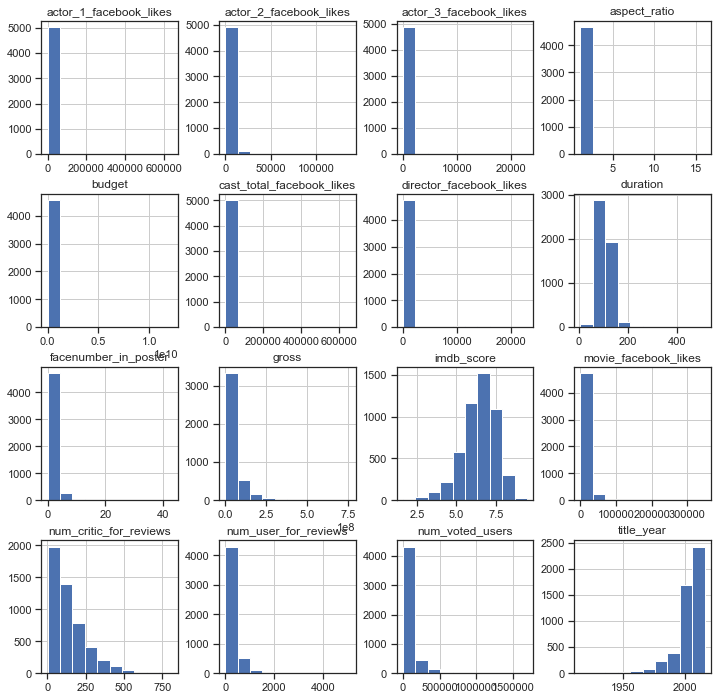

In [6]:
# Get an initial visualization of numeric data
md.hist(figsize=(12,12));

In [7]:
# Basic statistics of the Y value
md['imdb_score'].describe()

count    5043.000000
mean        6.442138
std         1.125116
min         1.600000
25%         5.800000
50%         6.600000
75%         7.200000
max         9.500000
Name: imdb_score, dtype: float64

In [8]:
md['duration'].value_counts().head(10)

90.0     161
100.0    141
101.0    139
98.0     135
97.0     131
93.0     129
94.0     124
99.0     124
95.0     124
96.0     113
Name: duration, dtype: int64

In [9]:
md['aspect_ratio'].value_counts().head()

2.35    2360
1.85    1906
1.78     110
1.37     100
1.33      68
Name: aspect_ratio, dtype: int64

### Analyze non-numeric columns

In [10]:
md['color'].describe()

count      5024
unique        2
top       Color
freq       4815
Name: color, dtype: object

In [11]:
md['color'].value_counts()

Color               4815
 Black and White     209
Name: color, dtype: int64

Most movies are in color

In [12]:
md['director_name'].describe()

count                 4939
unique                2398
top       Steven Spielberg
freq                    26
Name: director_name, dtype: object

In [13]:
md['director_name'].value_counts().head()

Steven Spielberg    26
Woody Allen         22
Clint Eastwood      20
Martin Scorsese     20
Ridley Scott        17
Name: director_name, dtype: int64

In [14]:
md['actor_2_name'].describe()

count               5030
unique              3032
top       Morgan Freeman
freq                  20
Name: actor_2_name, dtype: object

In [15]:
md['actor_2_name'].value_counts().head()

Morgan Freeman     20
Charlize Theron    15
Brad Pitt          14
Meryl Streep       11
James Franco       11
Name: actor_2_name, dtype: int64

In [16]:
md['genres'].describe()

count      5043
unique      914
top       Drama
freq        236
Name: genres, dtype: object

In [17]:
md['genres'].value_counts().head(20)

Drama                               236
Comedy                              209
Comedy|Drama                        191
Comedy|Drama|Romance                187
Comedy|Romance                      158
Drama|Romance                       152
Crime|Drama|Thriller                101
Horror                               71
Action|Crime|Drama|Thriller          68
Action|Crime|Thriller                65
Drama|Thriller                       64
Crime|Drama                          63
Horror|Thriller                      56
Crime|Drama|Mystery|Thriller         55
Documentary                          51
Comedy|Crime                         51
Action|Adventure|Sci-Fi              51
Action|Adventure|Thriller            46
Drama|Mystery|Thriller               37
Action|Adventure|Sci-Fi|Thriller     35
Name: genres, dtype: int64

- Genres are combined and redundant.

In [18]:
md['actor_1_name'].describe()

count               5036
unique              2097
top       Robert De Niro
freq                  49
Name: actor_1_name, dtype: object

In [19]:
md['actor_1_name'].value_counts().head()

Robert De Niro    49
Johnny Depp       41
Nicolas Cage      33
J.K. Simmons      31
Bruce Willis      30
Name: actor_1_name, dtype: int64

In [20]:
md['movie_title'].describe()

count                     5043
unique                    4917
top       Victor Frankenstein 
freq                         3
Name: movie_title, dtype: object

In [21]:
md['movie_title'].value_counts().head()

Victor Frankenstein     3
Halloween               3
King Kong               3
Home                    3
Ben-Hur                 3
Name: movie_title, dtype: int64

In [22]:
md['actor_3_name'].describe()

count               5020
unique              3521
top       Ben Mendelsohn
freq                   8
Name: actor_3_name, dtype: object

In [23]:
md['actor_3_name'].value_counts().head()

Ben Mendelsohn    8
Steve Coogan      8
John Heard        8
Kirsten Dunst     7
Anne Hathaway     7
Name: actor_3_name, dtype: int64

In [24]:
md['plot_keywords'].describe()

count               4890
unique              4760
top       based on novel
freq                   4
Name: plot_keywords, dtype: object

In [25]:
md['plot_keywords'].value_counts().head()

based on novel                                                         4
halloween|masked killer|michael myers|slasher|trick or treat           3
one word title                                                         3
eighteen wheeler|illegal street racing|truck|trucker|undercover cop    3
assistant|experiment|frankenstein|medical student|scientist            3
Name: plot_keywords, dtype: int64

In [26]:
md['movie_imdb_link'].describe()

count                                                  5043
unique                                                 4919
top       http://www.imdb.com/title/tt0360717/?ref_=fn_t...
freq                                                      3
Name: movie_imdb_link, dtype: object

In [27]:
md['movie_imdb_link'].value_counts().head()

http://www.imdb.com/title/tt0360717/?ref_=fn_tt_tt_1    3
http://www.imdb.com/title/tt2638144/?ref_=fn_tt_tt_1    3
http://www.imdb.com/title/tt2224026/?ref_=fn_tt_tt_1    3
http://www.imdb.com/title/tt0077651/?ref_=fn_tt_tt_1    3
http://www.imdb.com/title/tt3332064/?ref_=fn_tt_tt_1    3
Name: movie_imdb_link, dtype: int64

In [28]:
md['language'].describe()

count        5031
unique         47
top       English
freq         4704
Name: language, dtype: object

In [29]:
md['language'].value_counts().head(10)

English      4704
French         73
Spanish        40
Hindi          28
Mandarin       26
German         19
Japanese       18
Russian        11
Italian        11
Cantonese      11
Name: language, dtype: int64

Most movies are in English

In [30]:
md['country'].describe()

count     5038
unique      65
top        USA
freq      3807
Name: country, dtype: object

In [31]:
md['country'].value_counts().head(10)

USA          3807
UK            448
France        154
Canada        126
Germany        97
Australia      55
India          34
Spain          33
China          30
Italy          23
Name: country, dtype: int64

- Roughly 79% of the movies are from the US
- 8% of the movies are from the UK
- The other countries make up about 13%

In [32]:
md['content_rating'].describe()

count     4740
unique      18
top          R
freq      2118
Name: content_rating, dtype: object

In [33]:
md['content_rating'].value_counts()

R            2118
PG-13        1461
PG            701
Not Rated     116
G             112
Unrated        62
Approved       55
TV-14          30
TV-MA          20
X              13
TV-PG          13
TV-G           10
Passed          9
NC-17           7
GP              6
M               5
TV-Y7           1
TV-Y            1
Name: content_rating, dtype: int64

### Find any data quality issues

In [34]:
# Searching for null value locations in the dataset
md.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

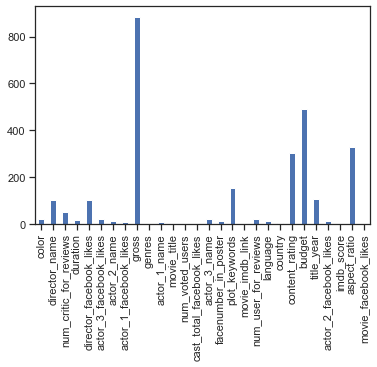

In [35]:
md.isnull().sum().plot.bar();

Gross variable has a lot of missing values

In [36]:
# Find duplicated rows
md.duplicated().sum()

45

### Data cleaning and transformation

In [37]:
# Remove duplicated rows
md.drop_duplicates().shape

(4998, 28)

>#### Split genres

In [38]:
# List genres 
md['genres'].head()

0    Action|Adventure|Fantasy|Sci-Fi
1           Action|Adventure|Fantasy
2          Action|Adventure|Thriller
3                    Action|Thriller
4                        Documentary
Name: genres, dtype: object

In [39]:
gnr = pd.DataFrame(md.genres.str.split('|').tolist(), index=md.imdb_score).stack()
gnr = gnr.reset_index()[[0, 'imdb_score']] # genres variable is currently labeled 0
gnr.columns = ['genres', 'imdb_score'] # renaming genres
gnr.head()

,genres,imdb_score
0,Action,7.9
1,Adventure,7.9
2,Fantasy,7.9
3,Sci-Fi,7.9
4,Action,7.1


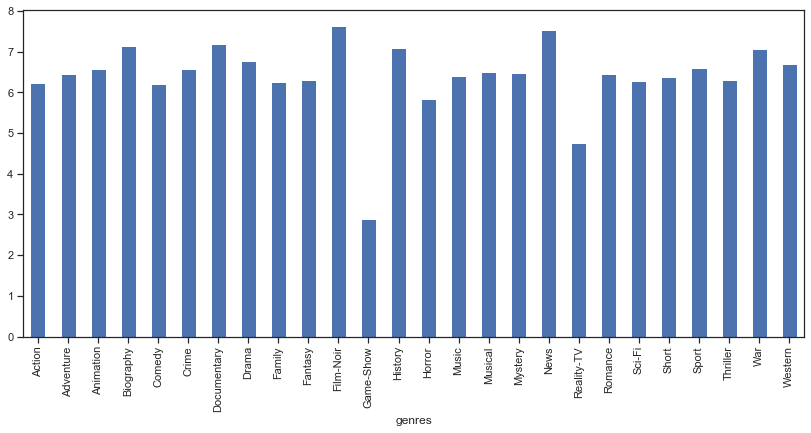

In [40]:
# Average genre imdb score
plt.figure(figsize=[14,6])
gnr.groupby('genres')['imdb_score'].mean().plot.bar();

>#### Remove unnecessary columns

In [41]:
md = md.drop(['color','language','aspect_ratio','facenumber_in_poster','plot_keywords','movie_imdb_link'], axis=1)
md.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,cast_total_facebook_likes,actor_3_name,num_user_for_reviews,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,4834,Wes Studi,3054.0,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,48350,Jack Davenport,1238.0,USA,PG-13,300000000.0,2007.0,5000.0,7.1,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,11700,Stephanie Sigman,994.0,UK,PG-13,245000000.0,2015.0,393.0,6.8,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,106759,Joseph Gordon-Levitt,2701.0,USA,PG-13,250000000.0,2012.0,23000.0,8.5,164000
4,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,...,143,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,0


In [42]:
md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 22 columns):
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
num_user_for_reviews         5022 non-null float64
country                      5038 non-null object
content_rating               4740 non-null object
budget                       4551 non-

>#### Handle missing values

In [43]:
# Drop rows with missing values
md=md.dropna(subset=['gross','budget'])
md.shape

(3891, 22)

In [44]:
# Recheck missing values
md.isnull().sum()

director_name                 0
num_critic_for_reviews        1
duration                      1
director_facebook_likes       0
actor_3_facebook_likes       10
actor_2_name                  5
actor_1_facebook_likes        3
gross                         0
genres                        0
actor_1_name                  3
movie_title                   0
num_voted_users               0
cast_total_facebook_likes     0
actor_3_name                 10
num_user_for_reviews          0
country                       0
content_rating               51
budget                        0
title_year                    0
actor_2_facebook_likes        5
imdb_score                    0
movie_facebook_likes          0
dtype: int64

In [45]:
md.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3891 entries, 0 to 5042
Data columns (total 22 columns):
director_name                3891 non-null object
num_critic_for_reviews       3890 non-null float64
duration                     3890 non-null float64
director_facebook_likes      3891 non-null float64
actor_3_facebook_likes       3881 non-null float64
actor_2_name                 3886 non-null object
actor_1_facebook_likes       3888 non-null float64
gross                        3891 non-null float64
genres                       3891 non-null object
actor_1_name                 3888 non-null object
movie_title                  3891 non-null object
num_voted_users              3891 non-null int64
cast_total_facebook_likes    3891 non-null int64
actor_3_name                 3881 non-null object
num_user_for_reviews         3891 non-null float64
country                      3891 non-null object
content_rating               3840 non-null object
budget                       3891 non-

In [46]:
md.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,cast_total_facebook_likes,actor_3_name,num_user_for_reviews,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,4834,Wes Studi,3054.0,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,48350,Jack Davenport,1238.0,USA,PG-13,300000000.0,2007.0,5000.0,7.1,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,11700,Stephanie Sigman,994.0,UK,PG-13,245000000.0,2015.0,393.0,6.8,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,106759,Joseph Gordon-Levitt,2701.0,USA,PG-13,250000000.0,2012.0,23000.0,8.5,164000
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,...,1873,Polly Walker,738.0,USA,PG-13,263700000.0,2012.0,632.0,6.6,24000


In [47]:
# Replace N/A's in 'num_critic_for_reviews' and 'duration' with variable average
md['num_critic_for_reviews'].fillna(md['num_critic_for_reviews'].mean(), inplace=True)
md['duration'].fillna(md['duration'].mean(), inplace=True)


In [48]:
# Replace N/A's in facebook likes with zero
md['director_facebook_likes'].fillna(0, inplace=True)
md['actor_3_facebook_likes'].fillna(0, inplace=True)
md['actor_1_facebook_likes'].fillna(0, inplace=True)
md['actor_2_facebook_likes'].fillna(0, inplace=True)

In [49]:
# Replace N/A actors with "Unknown"
md['actor_3_name'].replace(np.nan,'Unknown', inplace=True)
md['actor_2_name'].replace(np.nan,'Unknown', inplace=True)
md['actor_1_name'].replace(np.nan,'Unknown', inplace=True)

In [50]:
# Replace N/A content rating with 'Not Rated'
md['content_rating'].replace(np.nan,'Not Rated', inplace=True)

# Recheck null values
md.isnull().sum()

director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
num_user_for_reviews         0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
movie_facebook_likes         0
dtype: int64

In [51]:
md.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3891 entries, 0 to 5042
Data columns (total 22 columns):
director_name                3891 non-null object
num_critic_for_reviews       3891 non-null float64
duration                     3891 non-null float64
director_facebook_likes      3891 non-null float64
actor_3_facebook_likes       3891 non-null float64
actor_2_name                 3891 non-null object
actor_1_facebook_likes       3891 non-null float64
gross                        3891 non-null float64
genres                       3891 non-null object
actor_1_name                 3891 non-null object
movie_title                  3891 non-null object
num_voted_users              3891 non-null int64
cast_total_facebook_likes    3891 non-null int64
actor_3_name                 3891 non-null object
num_user_for_reviews         3891 non-null float64
country                      3891 non-null object
content_rating               3891 non-null object
budget                       3891 non-

>#### Handle inconsistent data

In [52]:
# Consolidate content rating values
md = md.replace({'content_rating': {'GP': 'PG', 'M': 'PG', 'X': 'NC-17', 'Approved':'R','Unrated':'Not Rated','Passed':'R'}})

md['content_rating'].value_counts()

R            1757
PG-13        1331
PG            579
Not Rated     117
G              91
NC-17          16
Name: content_rating, dtype: int64

In [53]:
# Consolidate country values
md.country.iloc[[(md['country'] != 'USA') & (md['country'] != 'UK')]] = 'OTHER'

md['country'].value_counts()

C:\Users\dabr5_000\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\dabr5_000\Anaconda3\lib\site-packages\pandas\core\internals\blocks.py:920: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  values[indexer] = value


USA      3074
OTHER     492
UK        325
Name: country, dtype: int64

In [54]:
md.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3891 entries, 0 to 5042
Data columns (total 22 columns):
director_name                3891 non-null object
num_critic_for_reviews       3891 non-null float64
duration                     3891 non-null float64
director_facebook_likes      3891 non-null float64
actor_3_facebook_likes       3891 non-null float64
actor_2_name                 3891 non-null object
actor_1_facebook_likes       3891 non-null float64
gross                        3891 non-null float64
genres                       3891 non-null object
actor_1_name                 3891 non-null object
movie_title                  3891 non-null object
num_voted_users              3891 non-null int64
cast_total_facebook_likes    3891 non-null int64
actor_3_name                 3891 non-null object
num_user_for_reviews         3891 non-null float64
country                      3891 non-null object
content_rating               3891 non-null object
budget                       3891 non-

>#### Add a column

In [55]:
# creating a new column based on existing columns
md['profit'] = md['gross'] - md['budget']
md['roi_pct'] = md['profit'] / md['budget']*100
md.head(2)

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit,roi_pct
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,3054.0,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000,523505847.0,220.888543
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,1238.0,USA,PG-13,300000000.0,2007.0,5000.0,7.1,0,9404152.0,3.134717


## Data visualization and business intelligence

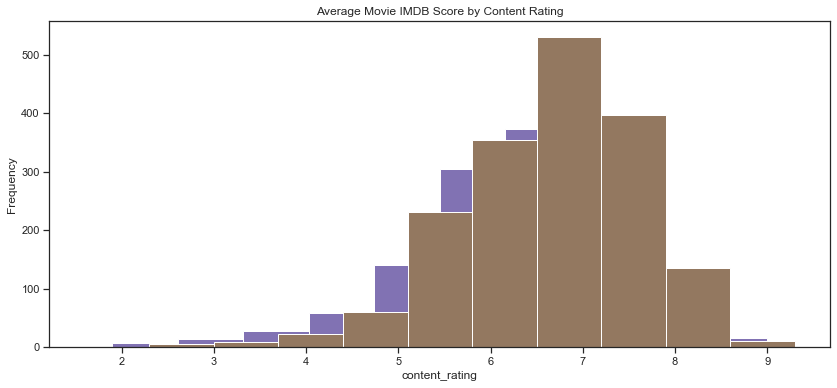

In [56]:
plt.figure(figsize=[14,6])
plt.title('Average Movie IMDB Score by Content Rating') 
plt.xlabel('content_rating')
plt.ylabel('IMDB Score')
md.groupby('content_rating')['imdb_score'].plot(kind='hist');

### Top 20 Movies Based on Profit Earned

In [57]:
md.groupby('movie_title')['profit'].sum().sort_values(ascending=False).head()

movie_title
The Avengers                           806559094.0
Avatar                                 523505847.0
Jurassic World                         502177271.0
Titanic                                458672302.0
Star Wars: Episode IV - A New Hope     449935665.0
Name: profit, dtype: float64

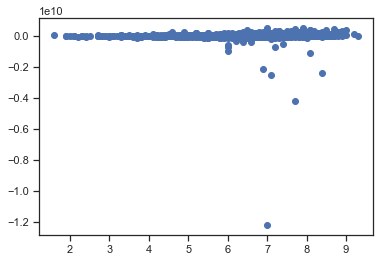

In [58]:
plt.scatter(md['imdb_score'], md['profit']);

In [59]:
# Checking for any correlations
md.corr()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit,roi_pct
num_critic_for_reviews,1.000000,0.239228,0.179250,0.257245,0.172557,0.476990,0.600437,0.243979,0.573564,0.107666,0.392415,0.259040,0.340190,0.703397,0.041345,0.033150
duration,0.239228,1.000000,0.180796,0.128350,0.087434,0.252764,0.344130,0.124473,0.356189,0.069574,-0.128197,0.132148,0.358176,0.221713,0.009599,-0.032498
director_facebook_likes,0.179250,0.180796,1.000000,0.119611,0.091673,0.142158,0.301847,0.121031,0.220459,0.019235,-0.045781,0.118477,0.189293,0.162555,0.024960,-0.006292
actor_3_facebook_likes,0.257245,0.128350,0.119611,1.000000,0.254175,0.303451,0.271603,0.490487,0.210196,0.041333,0.112049,0.554782,0.064245,0.272144,0.053009,-0.012159
actor_1_facebook_likes,0.172557,0.087434,0.091673,0.254175,1.000000,0.149114,0.183808,0.945236,0.127718,0.017618,0.091099,0.392226,0.091584,0.131702,0.028696,-0.015619
gross,0.476990,0.252764,0.142158,0.303451,0.149114,1.000000,0.631404,0.240982,0.552499,0.102179,0.046575,0.256866,0.211525,0.375455,0.208148,0.018516
num_voted_users,0.600437,0.344130,0.301847,0.271603,0.183808,0.631404,1.000000,0.254050,0.782493,0.068834,0.016773,0.249217,0.473209,0.522649,0.127181,0.010566
cast_total_facebook_likes,0.243979,0.124473,0.121031,0.490487,0.945236,0.240982,0.254050,1.000000,0.185527,0.030189,0.120310,0.643068,0.104546,0.206783,0.044688,-0.018608
num_user_for_reviews,0.573564,0.356189,0.220459,0.210196,0.127718,0.552499,0.782493,0.185527,1.000000,0.073352,0.011868,0.193021,0.320005,0.376885,0.098387,0.068651
budget,0.107666,0.069574,0.019235,0.041333,0.017618,0.102179,0.068834,0.030189,0.073352,1.000000,0.044990,0.037041,0.029135,0.054696,-0.951709,-0.008039


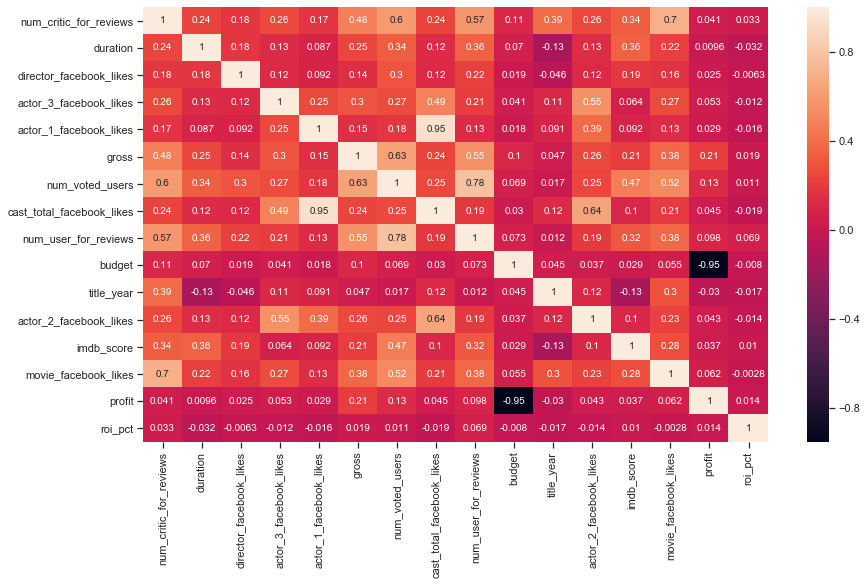

In [60]:
# correlation heatmap
plt.figure(figsize=(14,8))
sns.heatmap(md.corr(), annot=True);

- There appears to be a strong positive correlation between imdb score and number of voted users
- There is a negative correlation between imdb score and title year

In [61]:
md.groupby('num_voted_users').mean().head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,cast_total_facebook_likes,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit,roi_pct
num_voted_users,,,,,,,,,,,,,,,
5,1.0,110.0,0.0,0.0,2.0,3000000.0,4.0,1.0,100000.0,1920.0,2.0,4.8,0.0,2900000.0,2900.000000
22,4.0,125.0,7.0,17.0,128.0,3330.0,214.0,1.0,2100000.0,2015.0,22.0,7.2,305.0,-2096670.0,-99.841429
27,1.0,110.0,0.0,0.0,3.0,3830.0,5.0,1.0,1200000.0,2013.0,2.0,7.2,75.0,-1196170.0,-99.680833
40,10.0,82.0,0.0,0.0,0.0,21199.0,0.0,10.0,500000.0,2014.0,0.0,6.8,44.0,-478801.0,-95.760200
48,7.0,86.0,0.0,15.0,178.0,215185.0,279.0,2.0,200000.0,2008.0,58.0,7.5,26.0,15185.0,7.592500


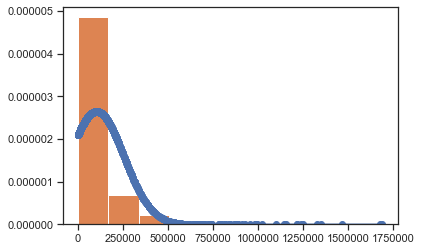

In [62]:
nvu = sorted(md['num_voted_users'])
fit = stats.norm.pdf(nvu, np.mean(nvu), np.std(nvu))  #this is a fitting indeed
plt.plot(nvu,fit,'-o');
plt.hist(nvu, density=True);

In [63]:
pg.normality(md['num_voted_users']).round(3)

,W,pval,normal
num_voted_users,0.628,0.0,False


- num_voted_users is non-parametric
- p-value (< 0.05). Reject null hypothesis

In [64]:
md.groupby('duration').mean().head()

,num_critic_for_reviews,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit,roi_pct
duration,,,,,,,,,,,,,,,
34.0,1.0,19.0,362.0,882.0,333658.0,97.0,1967.0,2.0,34000.0,1990.0,577.0,7.1,16.0,299658.0,881.347059
37.0,252.0,0.0,199.0,634.0,5923044.0,113451.0,1347.0,537.0,3600000.0,1987.0,328.0,7.8,0.0,2323044.0,64.529000
41.0,7.0,0.0,0.0,55.0,4074023.0,296.0,55.0,4.0,5000000.0,2010.0,0.0,6.9,89.0,-925977.0,-18.519540
42.0,9.0,0.0,0.0,844.0,7518876.0,172.0,844.0,5.0,6000000.0,2008.0,0.0,6.5,28.0,1518876.0,25.314600
45.0,80.0,28.0,104.0,573.0,145109.0,14247.0,1098.0,44.0,45000000.0,2008.0,197.0,7.3,0.0,-44854891.0,-99.677536


In [65]:
md['duration'].mean()

109.89640102827764

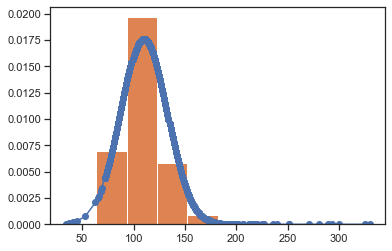

In [66]:
h = sorted(md['duration'])
fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed
plt.plot(h,fit,'-o');
plt.hist(h, density=True);

In [67]:
pg.normality(md['duration']).round(3)

,W,pval,normal
duration,0.848,0.0,False


- duration is non-parametric
- p-value (< 0.05). Reject null hypothesis

<Figure size 1008x576 with 0 Axes>

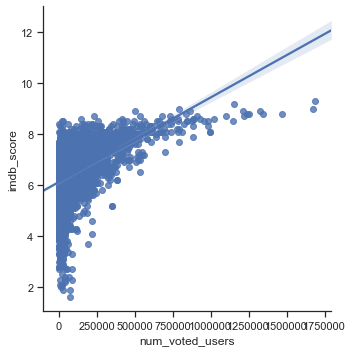

In [68]:
# lmplot for crim and imdb_score
plt.figure(figsize=(14,8))
sns.lmplot('num_voted_users', 'imdb_score', md);

<Figure size 1008x576 with 0 Axes>

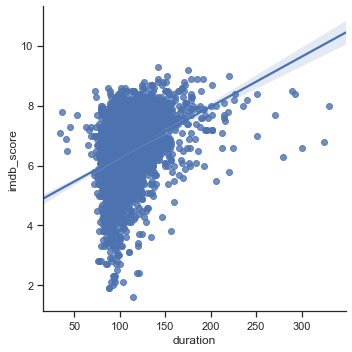

In [69]:
# lmplot for duration and imdb_score
plt.figure(figsize=(14,8))
sns.lmplot('duration', 'imdb_score', md);

### Exploratory Data Analysis (EDA)

In [70]:
md[['num_voted_users','imdb_score']].corr()

,num_voted_users,imdb_score
num_voted_users,1.000000,0.473209
imdb_score,0.473209,1.000000


In [71]:
pg.pairwise_corr(data=md, columns=['num_voted_users','imdb_score'], tail='one-sided', method='spearman')

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,power
0,num_voted_users,imdb_score,spearman,one-sided,3891,0.456,"[0.43, 0.48]",0.208,0.208,0.492,2.031577e-199,1.0


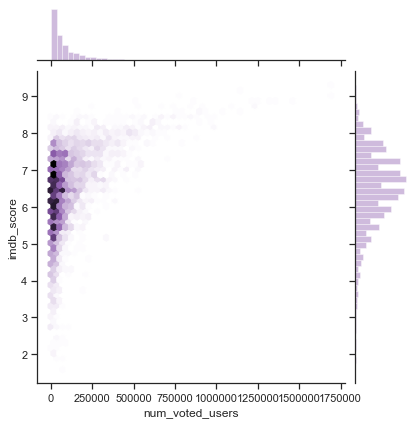

In [72]:
# jointplott for rooms and housing value
sns.jointplot('num_voted_users', "imdb_score", md, kind="hex", color="#8855AA")

In [73]:
# find out correlation of two columns: lower class, median housing price
md[['duration','imdb_score']].corr()

,duration,imdb_score
duration,1.000000,0.358176
imdb_score,0.358176,1.000000


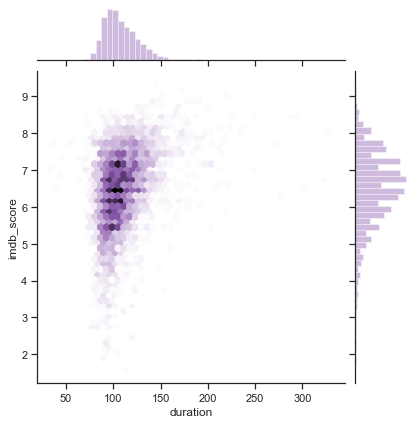

In [74]:
# jointplott for duration and imdb_score
sns.jointplot("duration", "imdb_score", md, kind="hex", color="#8855AA")

In [75]:
pg.pairwise_corr(data=md, columns=['duration','imdb_score'], tail='one-sided', method='spearman')

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,power
0,duration,imdb_score,spearman,one-sided,3891,0.378,"[0.35, 0.4]",0.143,0.142,0.398,1.712585e-132,1.0


## Regression

### Model development

In [76]:
# Assigning columns to X and Y variables
X = md['num_voted_users']
y = md['imdb_score']

In [77]:
# Create the model and call it lr.
lr = lm.LinearRegression()

# Train the model on our training dataset.
lr.fit(X[:,np.newaxis], y)    ## X needs to be 2d for LinearRegression so add [:,np.newaxis]

# Predict points with our trained model.
lr_y = lr.predict(X[:,np.newaxis])

In [78]:
# The coefficients
print('Coefficients: ', lr.coef_)

# y-intercept
print("y-intercept ", lr.intercept_)

Coefficients:  [3.31581397e-06]
y-intercept  6.123358010777848


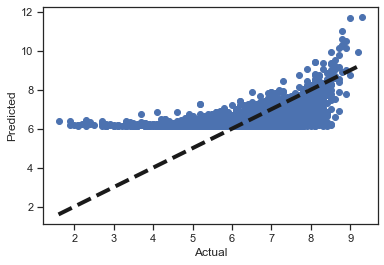

In [79]:
plt.subplots()
plt.scatter(y, lr_y)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)   #dotted line represents perfect prediction (actual = predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [80]:
print("mean square error: ", mse(y, lr_y))
print("variance or r-squared: ", evs(y, lr_y))

mean square error:  0.8653360095169468
variance or r-squared:  0.22392691266680875


### Model validation

In [81]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.33, random_state=42)

In [82]:
print(len(md),len(X), len(y))

3891 3891 3891


In [83]:
print(len(X_train), len(y_train))

2606 2606


In [84]:
print(len(X_test), len(y_test))

1285 1285


In [85]:
X_train.head()

1717      9004
4891      2742
842     244840
2562      4654
1786      4288
Name: num_voted_users, dtype: int64

In [86]:
y_train.head()

1717    6.6
4891    7.0
842     6.6
2562    6.7
1786    5.4
Name: imdb_score, dtype: float64

### Model evaluation

In [87]:
# Assigning columns to X and Y variables
X = md[['num_voted_users','duration']]
y = md['imdb_score']

In [88]:
# We create the model and call it lrm2.
lrm2 = lm.LinearRegression()
lrm2.fit(X, y)    
lrm2_y = lrm2.predict(X)

In [89]:
# The coefficients
print('Coefficients: ', lrm2.coef_)

# y-intercept
print("y-intercept ", lrm2.intercept_)

Coefficients:  [2.78153056e-06 1.03064506e-02]
y-intercept  5.045524802548178


In [90]:
coef = ["%.3f" % i for i in lrm2.coef_]
xcolumns = [ i for i in X.columns ]
zip(xcolumns, coef)

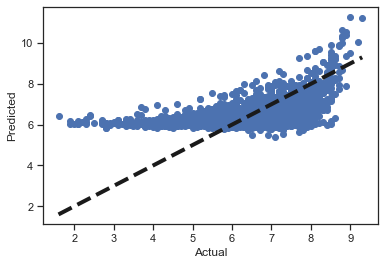

In [91]:
plt.subplots()
plt.scatter(y, lrm2_y)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)   #dotted line represents perfect prediction (actual = predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [92]:
print("mean square error: ", mse(y, lrm2_y))
print("variance or r-squared: ", evs(y, lrm2_y))

mean square error:  0.8170785056347614
variance or r-squared:  0.2672064591238519


### Advanced regression models

>### Lasso Regression (Regularization)

In [93]:
md.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit,roi_pct
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,3054.0,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000,523505847.0,220.888543
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,1238.0,USA,PG-13,300000000.0,2007.0,5000.0,7.1,0,9404152.0,3.134717
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,994.0,UK,PG-13,245000000.0,2015.0,393.0,6.8,85000,-44925825.0,-18.337071
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,2701.0,USA,PG-13,250000000.0,2012.0,23000.0,8.5,164000,198130642.0,79.252257
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,...,738.0,USA,PG-13,263700000.0,2012.0,632.0,6.6,24000,-190641321.0,-72.294775


In [94]:
mdls = md
mdls = mdls.drop(['director_name', 'actor_2_name', 'genres','actor_1_name','country','content_rating','movie_title','actor_3_name'], axis=1)
mdls.head(2)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit,roi_pct
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,3054.0,237000000.0,2009.0,936.0,7.9,33000,523505847.0,220.888543
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,1238.0,300000000.0,2007.0,5000.0,7.1,0,9404152.0,3.134717


In [95]:
# Compare with all X variables
y = mdls['imdb_score'] 
X = mdls.drop(['imdb_score'], axis =1)

In [96]:
lsm1 = lm.Lasso(alpha=1.0)            #higher alpha (penality parameter), fewer predictors
lsm1.fit(X, y)
lsm1_y = lsm1.predict(X)

C:\Users\dabr5_000\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1523.2941103177618, tolerance: 0.43385377846311995
  positive)


In [97]:
print('Coefficients: ', lsm1.coef_)
print("y-intercept ", lsm1.intercept_)

Coefficients:  [ 1.57296593e-03  8.65600476e-03  7.99688657e-06  6.70188541e-05
  7.25422539e-05 -1.88466870e-09  3.94321918e-06 -7.19822678e-05
 -5.13268651e-04 -6.15617620e-12 -6.99308774e-03  7.55372886e-05
 -1.48846831e-06  2.92978355e-11  1.40836227e-06]
y-intercept  19.19155220601801


In [98]:
coef = ["%.3f" % i for i in lsm1.coef_]
xcolumns = [ i for i in X.columns ]
list(zip(xcolumns, coef))

[('num_critic_for_reviews', '0.002'),
 ('duration', '0.009'),
 ('director_facebook_likes', '0.000'),
 ('actor_3_facebook_likes', '0.000'),
 ('actor_1_facebook_likes', '0.000'),
 ('gross', '-0.000'),
 ('num_voted_users', '0.000'),
 ('cast_total_facebook_likes', '-0.000'),
 ('num_user_for_reviews', '-0.001'),
 ('budget', '-0.000'),
 ('title_year', '-0.007'),
 ('actor_2_facebook_likes', '0.000'),
 ('movie_facebook_likes', '-0.000'),
 ('profit', '0.000'),
 ('roi_pct', '0.000')]

In [99]:
print("mean square error: ", mse(y, lsm1_y))
print("variance or r-squared: ", evs(y, lsm1_y))

mean square error:  0.7479615972193391
variance or r-squared:  0.32919367785848586


>### f_Regression (Feature Selection)

In [100]:
# Select only 2 X variables
X_new = skb(freg, k=2).fit_transform(X, y)
print(X_new[0:5])

[[1.780000e+02 8.862040e+05]
 [1.690000e+02 4.712200e+05]
 [1.480000e+02 2.758680e+05]
 [1.640000e+02 1.144337e+06]
 [1.320000e+02 2.122040e+05]]


In [101]:
# This helps us find out which variables are selected
selector = skb(freg, k=2).fit(X, y)
idxs_selected = selector.get_support(indices=True)
print(idxs_selected)

[1 6]


In [102]:
fr1 = lm.LinearRegression()
fr1.fit(X_new, y)
fr1_y = fr1.predict(X_new)

print("mean square error: ", mse(y, fr1_y))
print("variance or r-squared: ", evs(y, fr1_y))

mean square error:  0.8170785056347614
variance or r-squared:  0.2672064591238519


## Classification

### Decision tree

>### Categorical to Dummy Variables

In [103]:
md.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3891 entries, 0 to 5042
Data columns (total 24 columns):
director_name                3891 non-null object
num_critic_for_reviews       3891 non-null float64
duration                     3891 non-null float64
director_facebook_likes      3891 non-null float64
actor_3_facebook_likes       3891 non-null float64
actor_2_name                 3891 non-null object
actor_1_facebook_likes       3891 non-null float64
gross                        3891 non-null float64
genres                       3891 non-null object
actor_1_name                 3891 non-null object
movie_title                  3891 non-null object
num_voted_users              3891 non-null int64
cast_total_facebook_likes    3891 non-null int64
actor_3_name                 3891 non-null object
num_user_for_reviews         3891 non-null float64
country                      3891 non-null object
content_rating               3891 non-null object
budget                       3891 non-

In [104]:
mddv = md
mddv = mddv.drop(['director_name', 'actor_2_name', 'actor_1_name','genres','movie_title','actor_3_name'], axis=1)
mdls.head(2)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit,roi_pct
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,3054.0,237000000.0,2009.0,936.0,7.9,33000,523505847.0,220.888543
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,1238.0,300000000.0,2007.0,5000.0,7.1,0,9404152.0,3.134717


In [105]:
# convert categorical variables to dummy variables

mddv =  pd.get_dummies(mddv, columns=["content_rating","country"],
                         prefix=["content","country"],
                         drop_first=True)
mddv.head(2)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,...,movie_facebook_likes,profit,roi_pct,content_NC-17,content_Not Rated,content_PG,content_PG-13,content_R,country_UK,country_USA
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,3054.0,237000000.0,...,33000,523505847.0,220.888543,0,0,0,1,0,0,1
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,1238.0,300000000.0,...,0,9404152.0,3.134717,0,0,0,1,0,0,1


In [106]:
mddv.groupby('imdb_score').count().head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,...,movie_facebook_likes,profit,roi_pct,content_NC-17,content_Not Rated,content_PG,content_PG-13,content_R,country_UK,country_USA
imdb_score,,,,,,,,,,,,,,,,,,,,,
1.6,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1.9,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
2.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2.1,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2.2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [107]:
# create bins and name the bins to Bad, OKay, Good, Excellent
bins = [0,4,6,8,10]
mddv['rating'] = pd.cut(mddv['imdb_score'], bins, labels=['Bad', 'Okay', 'Good', 'Excellent'])
mddv.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,...,profit,roi_pct,content_NC-17,content_Not Rated,content_PG,content_PG-13,content_R,country_UK,country_USA,rating
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,3054.0,237000000.0,...,523505847.0,220.888543,0,0,0,1,0,0,1,Good
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,1238.0,300000000.0,...,9404152.0,3.134717,0,0,0,1,0,0,1,Good
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,994.0,245000000.0,...,-44925825.0,-18.337071,0,0,0,1,0,1,0,Good
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,2701.0,250000000.0,...,198130642.0,79.252257,0,0,0,1,0,0,1,Excellent
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,738.0,263700000.0,...,-190641321.0,-72.294775,0,0,0,1,0,0,1,Good


In [108]:
obj = md[['director_name', 'actor_2_name', 'genres','actor_1_name','country','content_rating','movie_title','actor_3_name']]
mdts = md.drop(obj, axis=1)
bins = [0,4,6,8,10]
mdts['rating'] = pd.cut(mdts['imdb_score'], bins, labels=[1,2,3,4]).astype(int)
#ti['Survived'] = ti['Survived'].astype(int)
#ti.info()
mdts.head(2)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit,roi_pct,rating
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,3054.0,237000000.0,2009.0,936.0,7.9,33000,523505847.0,220.888543,3
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,1238.0,300000000.0,2007.0,5000.0,7.1,0,9404152.0,3.134717,3


In [109]:
# Declare X variables and y variable
y = mdts['rating']
X = mdts.drop(['rating'], axis = 1)

print(y.shape,X.shape)

(3891,) (3891, 16)


In [110]:
mdts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3891 entries, 0 to 5042
Data columns (total 17 columns):
num_critic_for_reviews       3891 non-null float64
duration                     3891 non-null float64
director_facebook_likes      3891 non-null float64
actor_3_facebook_likes       3891 non-null float64
actor_1_facebook_likes       3891 non-null float64
gross                        3891 non-null float64
num_voted_users              3891 non-null int64
cast_total_facebook_likes    3891 non-null int64
num_user_for_reviews         3891 non-null float64
budget                       3891 non-null float64
title_year                   3891 non-null float64
actor_2_facebook_likes       3891 non-null float64
imdb_score                   3891 non-null float64
movie_facebook_likes         3891 non-null int64
profit                       3891 non-null float64
roi_pct                      3891 non-null float64
rating                       3891 non-null int32
dtypes: float64(13), int32(1), int

>### Split validation

In [111]:
# Split validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train.head()

# Initialize DecisionTreeClassifier()
dt = DecisionTreeClassifier()

# Train a decision tree model
dt = dt.fit(X_train, y_train)

In [112]:
print(len(X_train), len(X_test))

2723 1168


In [113]:
y_test.head()

305     2
1340    3
1564    1
129     3
3097    2
Name: rating, dtype: int32

In [114]:
# Model evaluation
print(metrics.accuracy_score(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt.predict(X_test)))


1.0
--------------------------------------------------------
[[ 26   0   0   0]
 [  0 317   0   0]
 [  0   0 777   0]
 [  0   0   0  48]]
--------------------------------------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00       317
           3       1.00      1.00      1.00       777
           4       1.00      1.00      1.00        48

    accuracy                           1.00      1168
   macro avg       1.00      1.00      1.00      1168
weighted avg       1.00      1.00      1.00      1168



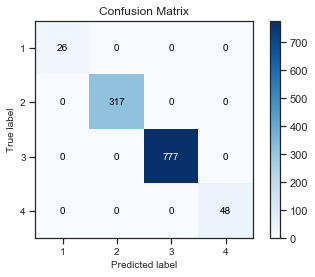

In [115]:
# Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_true=np.array(y_test), y_pred=dt.predict(X_test))
plt.show()

In [116]:
from sklearn.externals.six import StringIO

# install pydotplus first (if not already done)
import pydotplus

dot_data = StringIO() 
tree.export_graphviz(dt, out_file=dot_data, feature_names=X.columns,
                     filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("data/dt.pdf")

C:\Users\dabr5_000\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


True

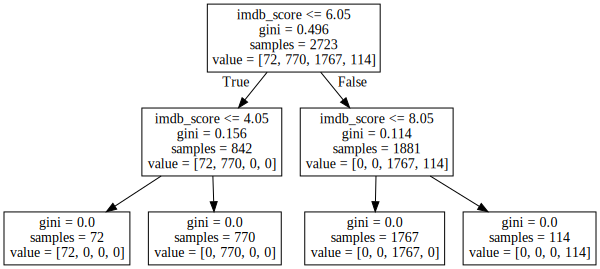

In [117]:
from graphviz import Source
from sklearn import tree
Source( tree.export_graphviz(dt, out_file=None, feature_names=X.columns))

>### 10-fold cross validation

In [118]:
# evaluate the decision tree model using 10-fold cross-validation

# initialize decision tree algorithm (without fitting)

scores = cross_val_score(DecisionTreeClassifier(), X, y, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1.0


In [119]:
# https://scikit-learn.org/stable/modules/cross_validation.html
#The mean score and the 95% confidence interval of the score estimate are hence given by:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 1.00 (+/- 0.00)


#### Random Forest Classifier

In [120]:
clf = RandomForestClassifier(n_estimators=20)    
clf=clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9982876712328768

In [121]:
# generate evaluation metrics
print(metrics.accuracy_score(y_test, clf.predict(X_test))) #overall accuracy
print(metrics.confusion_matrix(y_test, clf.predict(X_test)))
print(metrics.classification_report(y_test, clf.predict(X_test)))

0.9982876712328768
[[ 26   0   0   0]
 [  0 317   0   0]
 [  0   0 777   0]
 [  0   0   2  46]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00       317
           3       1.00      1.00      1.00       777
           4       1.00      0.96      0.98        48

    accuracy                           1.00      1168
   macro avg       1.00      0.99      0.99      1168
weighted avg       1.00      1.00      1.00      1168



#### Feature Selection

In [122]:
# Feature Selection dataframe
pd.DataFrame(clf.feature_importances_, index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

,importance
imdb_score,0.766844
num_voted_users,0.064848
duration,0.027823
num_user_for_reviews,0.017752
num_critic_for_reviews,0.014571
budget,0.014269
movie_facebook_likes,0.011902
director_facebook_likes,0.011018
gross,0.010908
actor_3_facebook_likes,0.009871


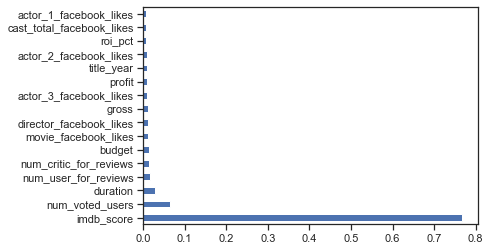

In [123]:
# Bar graph
pd.DataFrame(clf.feature_importances_, index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False).plot(kind='barh', 
                                                                                                            legend=None);

In [124]:
# Predict class probabilities for X
clf.predict_proba(X_test)

array([[0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  ],
       [0.85, 0.1 , 0.05, 0.  ],
       ...,
       [0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.05, 0.95, 0.  ],
       [0.1 , 0.85, 0.05, 0.  ]])

## Clustering

In [125]:
# drop non-numeric columns
md = md.drop(obj, axis=1)
md.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3891 entries, 0 to 5042
Data columns (total 16 columns):
num_critic_for_reviews       3891 non-null float64
duration                     3891 non-null float64
director_facebook_likes      3891 non-null float64
actor_3_facebook_likes       3891 non-null float64
actor_1_facebook_likes       3891 non-null float64
gross                        3891 non-null float64
num_voted_users              3891 non-null int64
cast_total_facebook_likes    3891 non-null int64
num_user_for_reviews         3891 non-null float64
budget                       3891 non-null float64
title_year                   3891 non-null float64
actor_2_facebook_likes       3891 non-null float64
imdb_score                   3891 non-null float64
movie_facebook_likes         3891 non-null int64
profit                       3891 non-null float64
roi_pct                      3891 non-null float64
dtypes: float64(13), int64(3)
memory usage: 516.8 KB


### Variance analysis

In [126]:
# variance test
md.var()

num_critic_for_reviews       1.538537e+04
duration                     5.154651e+02
director_facebook_likes      9.106376e+06
actor_3_facebook_likes       3.476815e+06
actor_1_facebook_likes       2.359786e+08
gross                        4.872387e+15
num_voted_users              2.271537e+10
cast_total_facebook_likes    3.581691e+08
num_user_for_reviews         1.664691e+05
budget                       4.945707e+16
title_year                   1.000270e+02
actor_2_facebook_likes       2.010091e+07
imdb_score                   1.115305e+00
movie_facebook_likes         4.538077e+08
profit                       5.115713e+16
roi_pct                      1.680197e+08
dtype: float64

### Normalize data & check variance again

In [127]:
# normalize data and save as mdnorm
mdnorm = (md - md.mean()) / (md.max() - md.min())
mdnorm.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit,roi_pct
0,0.689366,0.230080,-0.033970,0.004496,-0.010279,0.932867,0.463747,-0.009789,0.538978,0.015701,0.061651,-0.007534,0.186558,0.068372,0.040643,-0.000423
1,0.170893,0.199674,-0.009492,0.010800,0.050658,0.339707,0.218159,0.056472,0.180014,0.020858,0.040818,0.022130,0.082662,-0.026184,0.000279,-0.000726
2,0.540351,0.128728,-0.033970,-0.025678,0.005346,0.195947,0.102550,0.000665,0.131783,0.016355,0.124151,-0.011497,0.043701,0.217369,-0.003986,-0.000756
3,0.800204,0.182782,0.922552,0.967322,0.030346,0.522121,0.616510,0.145411,0.469201,0.016765,0.092901,0.153517,0.264480,0.443730,0.015097,-0.000620
5,0.367938,0.074674,-0.013318,-0.009635,-0.010842,0.028933,0.064874,-0.014298,0.081180,0.017886,0.092901,-0.009753,0.017727,0.042584,-0.015427,-0.000831


In [128]:
# variance test again
mdnorm.var()

num_critic_for_reviews       0.023334
duration                     0.005883
director_facebook_likes      0.017214
actor_3_facebook_likes       0.006572
actor_1_facebook_likes       0.000576
gross                        0.008424
num_voted_users              0.007956
cast_total_facebook_likes    0.000830
num_user_for_reviews         0.006504
budget                       0.000331
title_year                   0.010854
actor_2_facebook_likes       0.001071
imdb_score                   0.018811
movie_facebook_likes         0.003726
profit                       0.000315
roi_pct                      0.000325
dtype: float64

>### K-means

In [129]:
# clustering analysis with k = 2
k_means = KMeans(init='k-means++', n_clusters=2, random_state=0)
k_means.fit(mdnorm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [130]:
# clustering results
k_means.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [131]:
# cluster centroids or centers
k_means.cluster_centers_

array([[ 0.21897985,  0.04477567,  0.0728185 ,  0.03691879,  0.00769811,
         0.08262399,  0.11254544,  0.01258002,  0.09093715,  0.00345349,
         0.04159292,  0.01462083,  0.10491376,  0.06658297,  0.00162128,
         0.00123586],
       [-0.05847069, -0.01195573, -0.01944356, -0.00985783, -0.0020555 ,
        -0.02206176, -0.03005121, -0.00335904, -0.02428149, -0.00092213,
        -0.01110589, -0.00390397, -0.02801344, -0.01777859, -0.0004329 ,
        -0.00032999]])

In [132]:
#To add cluster label into the dataset as a column
md1 = pd.DataFrame(k_means.labels_, columns = ['cluster'])
md1.head()

,cluster
0,0
1,0
2,0
3,0
4,0


In [133]:
# resetting indices on joined datasets
mdnorm = mdnorm.reset_index(drop=True)
md1 = md1.reset_index(drop=True)
md2 = mdnorm.join(md1)
md2.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit,roi_pct,cluster
0,0.689366,0.230080,-0.033970,0.004496,-0.010279,0.932867,0.463747,-0.009789,0.538978,0.015701,0.061651,-0.007534,0.186558,0.068372,0.040643,-0.000423,0
1,0.170893,0.199674,-0.009492,0.010800,0.050658,0.339707,0.218159,0.056472,0.180014,0.020858,0.040818,0.022130,0.082662,-0.026184,0.000279,-0.000726,0
2,0.540351,0.128728,-0.033970,-0.025678,0.005346,0.195947,0.102550,0.000665,0.131783,0.016355,0.124151,-0.011497,0.043701,0.217369,-0.003986,-0.000756,0
3,0.800204,0.182782,0.922552,0.967322,0.030346,0.522121,0.616510,0.145411,0.469201,0.016765,0.092901,0.153517,0.264480,0.443730,0.015097,-0.000620,0
4,0.367938,0.074674,-0.013318,-0.009635,-0.010842,0.028933,0.064874,-0.014298,0.081180,0.017886,0.092901,-0.009753,0.017727,0.042584,-0.015427,-0.000831,0


In [134]:
md2.tail()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit,roi_pct,cluster
3886,-0.024920,-0.111136,-0.021318,-0.032330,-0.011387,-0.066574,-0.017721,-0.016590,0.008636,-0.003700,0.009568,-0.014037,0.069675,0.028257,-0.000426,0.007565,1
3887,-0.157925,-0.101001,-0.033970,-0.032678,-0.011842,-0.067041,-0.060360,-0.017150,-0.057780,-0.003700,0.019985,-0.014366,-0.021234,-0.025972,-0.000454,0.000522,1
3888,-0.132062,-0.097623,-0.033970,-0.032417,-0.011653,-0.064449,-0.029903,-0.016926,-0.039002,-0.003700,-0.115432,-0.014220,0.056688,-0.026184,-0.000299,0.039656,1
3889,-0.183787,-0.050326,-0.033970,-0.026896,-0.011379,-0.067127,-0.059917,-0.016100,-0.061931,-0.003700,0.082485,-0.012870,-0.008247,-0.025000,-0.000459,-0.000798,1
3890,-0.148072,-0.067218,-0.033274,-0.031983,-0.011708,-0.067021,-0.058173,-0.016902,-0.048094,-0.003701,0.009568,-0.014198,0.017727,-0.024877,-0.000452,0.009899,1


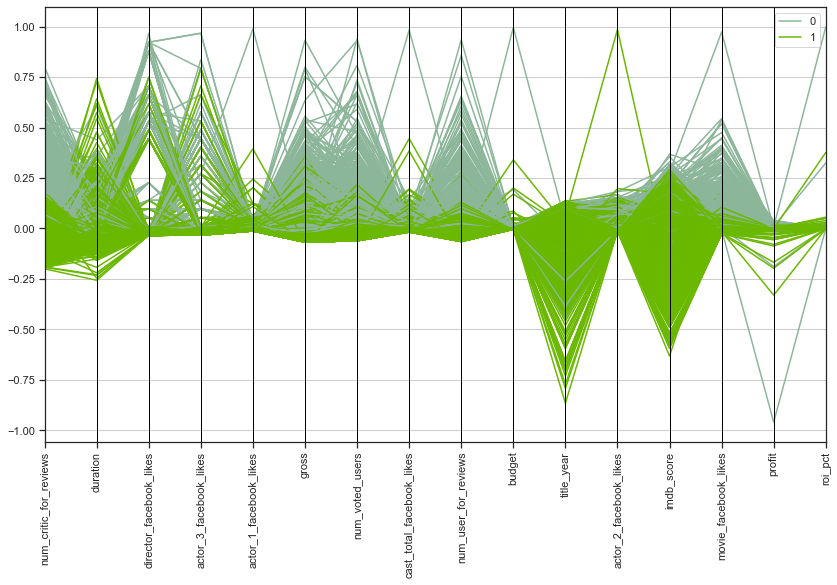

In [135]:
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(14,8))
parallel_coordinates(md2, 'cluster')
plt.xticks(rotation=90)
plt.show()

In [136]:
# combine cluster data with original dataset
md = md.reset_index(drop=True)
md1 = md1.reset_index(drop=True)
md3 = md.join(md1)
md3.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit,roi_pct,cluster
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,3054.0,237000000.0,2009.0,936.0,7.9,33000,523505847.0,220.888543,0
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,1238.0,300000000.0,2007.0,5000.0,7.1,0,9404152.0,3.134717,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,994.0,245000000.0,2015.0,393.0,6.8,85000,-44925825.0,-18.337071,0
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,2701.0,250000000.0,2012.0,23000.0,8.5,164000,198130642.0,79.252257,0
4,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,738.0,263700000.0,2012.0,632.0,6.6,24000,-190641321.0,-72.294775,0


In [137]:
md3.tail()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit,roi_pct,cluster
3886,143.0,77.0,291.0,8.0,291.0,424760.0,72639,368,371.0,7000.0,2004.0,45.0,7.0,19000,417760.0,5968.000000,1
3887,35.0,80.0,0.0,0.0,0.0,70071.0,589,0,35.0,7000.0,2005.0,0.0,6.3,74,63071.0,901.014286,1
3888,56.0,81.0,0.0,6.0,121.0,2040920.0,52055,147,130.0,7000.0,1992.0,20.0,6.9,0,2033920.0,29056.000000,1
3889,14.0,95.0,0.0,133.0,296.0,4584.0,1338,690,14.0,9000.0,2011.0,205.0,6.4,413,-4416.0,-49.066667,1
3890,43.0,90.0,16.0,16.0,86.0,85222.0,4285,163,84.0,1100.0,2004.0,23.0,6.6,456,84122.0,7647.454545,1


In [138]:
md3.groupby(['cluster']).mean().T

cluster,0,1
num_critic_for_reviews,3.410463e+02,1.157565e+02
duration,1.231500e+02,1.063575e+02
director_facebook_likes,2.456133e+03,3.341055e+02
actor_3_facebook_likes,1.600730e+03,5.248681e+02
actor_1_facebook_likes,1.250562e+04,6.263306e+03
gross,1.138910e+08,3.427690e+07
num_voted_users,2.927581e+05,5.180411e+04
cast_total_facebook_likes,1.952473e+04,9.057070e+03
num_user_for_reviews,7.873610e+02,2.044699e+02
budget,8.739635e+07,3.394601e+07


In [139]:
md3.groupby(['cluster']).size()

cluster
0     820
1    3071
dtype: int64

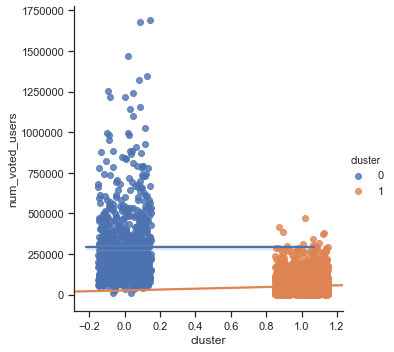

In [140]:
# visualization
sns.lmplot("cluster", "num_voted_users", md3, hue='cluster', x_jitter=.15, y_jitter=.15)

>### Hierarchical

In [141]:
X = (md - md.mean()) / (md.max() - md.min())
X.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit,roi_pct
0,0.689366,0.230080,-0.033970,0.004496,-0.010279,0.932867,0.463747,-0.009789,0.538978,0.015701,0.061651,-0.007534,0.186558,0.068372,0.040643,-0.000423
1,0.170893,0.199674,-0.009492,0.010800,0.050658,0.339707,0.218159,0.056472,0.180014,0.020858,0.040818,0.022130,0.082662,-0.026184,0.000279,-0.000726
2,0.540351,0.128728,-0.033970,-0.025678,0.005346,0.195947,0.102550,0.000665,0.131783,0.016355,0.124151,-0.011497,0.043701,0.217369,-0.003986,-0.000756
3,0.800204,0.182782,0.922552,0.967322,0.030346,0.522121,0.616510,0.145411,0.469201,0.016765,0.092901,0.153517,0.264480,0.443730,0.015097,-0.000620
4,0.367938,0.074674,-0.013318,-0.009635,-0.010842,0.028933,0.064874,-0.014298,0.081180,0.017886,0.092901,-0.009753,0.017727,0.042584,-0.015427,-0.000831


In [142]:
# setting random seed to get the same results each time.
np.random.seed(1) 
agg= AgglomerativeClustering(n_clusters=4, linkage='ward').fit(X)
agg.labels_

array([0, 0, 0, ..., 1, 3, 3], dtype=int64)

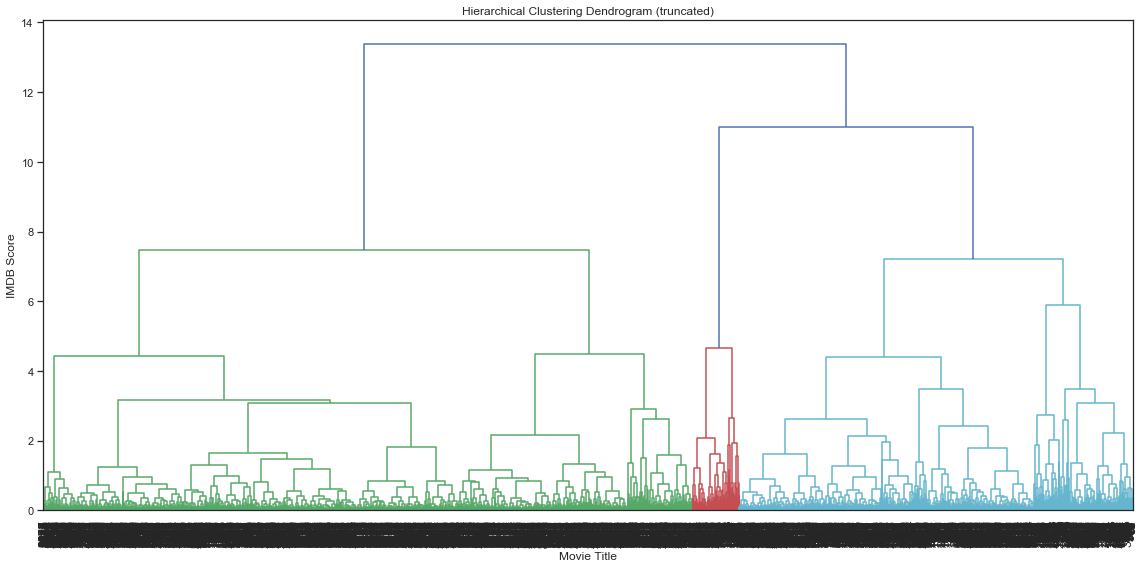

In [143]:
plt.figure(figsize=(16,8))

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Movie Title')
plt.ylabel('IMDB Score')

linkage_matrix = ward(X)
dendrogram(linkage_matrix, 
           #truncate_mode='lastp',  # show only the last p merged clusters
           #p=12,  # show only the last p merged clusters
           #show_leaf_counts=False,  # otherwise numbers in brackets are counts
           leaf_rotation=90.,
           leaf_font_size=12.,
           show_contracted=True,  # to get a distribution impression in truncated branches
           orientation="top")
plt.tight_layout() # fixes margins

In [144]:
#To add cluster label into the dataset as a column
md1 = pd.DataFrame(agg.labels_, columns = ['cluster'])
md1.head()

,cluster
0,0
1,0
2,0
3,2
4,0


In [145]:
md2 = md.join(md1)
md2.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit,roi_pct,cluster
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,3054.0,237000000.0,2009.0,936.0,7.9,33000,523505847.0,220.888543,0
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,1238.0,300000000.0,2007.0,5000.0,7.1,0,9404152.0,3.134717,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,994.0,245000000.0,2015.0,393.0,6.8,85000,-44925825.0,-18.337071,0
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,2701.0,250000000.0,2012.0,23000.0,8.5,164000,198130642.0,79.252257,2
4,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,738.0,263700000.0,2012.0,632.0,6.6,24000,-190641321.0,-72.294775,0


In [146]:
md2.groupby('cluster').mean()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit,roi_pct
cluster,,,,,,,,,,,,,,,,
0,273.734708,113.655761,236.344950,1200.257468,10558.561166,8.195638e+07,185912.264580,15951.626600,547.838549,6.690657e+07,2007.773826,3026.555477,6.918208,20435.551920,1.504981e+07,849.451871
1,88.348449,117.694511,150.805489,374.970167,5109.389021,3.380531e+07,55349.517900,7562.712411,191.970167,3.458495e+07,1995.187351,1387.738663,7.126969,1809.490453,-7.796431e+05,806.726232
2,247.518293,125.932927,14713.414634,1570.493902,13616.292683,9.185812e+07,279315.518293,20599.310976,677.073171,5.361407e+07,2000.396341,3993.859756,7.277439,21540.371951,3.824405e+07,184.701866
3,91.467454,100.152324,113.547539,448.496966,5481.552259,2.699308e+07,30727.428186,7876.407957,156.028995,2.971521e+07,2003.390425,1068.589346,5.567498,1197.027647,-2.722134e+06,96.814598


In [147]:
md2.groupby('cluster').size()

cluster
0    1406
1     838
2     164
3    1483
dtype: int64

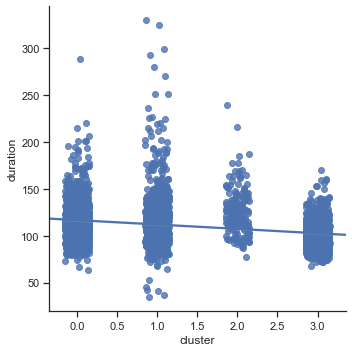

In [148]:
sns.lmplot("cluster", "duration", md2, x_jitter=.15, y_jitter=.15);

## Analysis

>###  Key findings from regression

>###  Key findings from classification

>### Key findings from clustering

>### My "best" classification model

## Story Telling

What variables are considered important to predict imdb_score and movie success?

- The number of voted users and both user and critic reviews appeared to have a strong influence on the IMDB score and movir success

What recommendations do you have for movie producers / investors / viewers?

- My recommendation would be to encourage reviews and track what features resulted in positive reviews.

What additional variables would you need to improve the model prediction?

Additional variables I feel would improve model predictions are
- timeline data of movie release
- length of time in theaters
- preview length

Other suggestions